In [ ]:
!pip install Sastrawi==1.0.1
!pip install tldextract 

     |████████████████████████████████| 209 kB 10.5 MB/s 
     |████████████████████████████████| 87 kB 4.0 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from tldextract import extract
import datetime
import requests
import sqlite3
import nltk
from sqlalchemy import create_engine
import pandas as pd
from collections import OrderedDict
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import re
import tldextract
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('indonesian'))

plt.style.use('ggplot')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#==============================================#

def array_to_csv(url,text,title,keyword,date):
  #crawling_record_df = pd.read_csv('/content/gdrive/MyDrive/spasi_project/output_dataseet_web_crawling/output_crawling.csv')
  dict = {'link':url,'tanggal':date,'judul':title,'keyword':keyword,'detail':text}
  new_df = pd.DataFrame(dict)
  #df3 = crawling_record_df.append(new_df, ignore_index = True)
  return new_df

def join_csv(df):
  crawling_record_df = pd.read_csv('/content/gdrive/MyDrive/spasi_project/output_dataseet_web_crawling/output_clean.csv')
  join_df = crawling_record_df.append(df, ignore_index = True)
  return join_df
  #data = join_df.to_csv('/content/gdrive/MyDrive/spasi_project/output_dataseet_web_crawling/output1.csv', sep=',')
  #return data

#==============================================#
def removePunctuation(strs):
    remove = string.punctuation
    remove = remove.replace("-", "") # don't remove hyphens
    remove = remove.replace("@", "") # don't remove hyphens
    remove = remove.replace("#", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern

    h = re.sub(pattern, " ", strs) 
    return h
#==============================================#
def replace(strs):
    strs = strs.replace('\n','')
    strs = strs.replace('\t','')
    strs = strs.replace('rt','')
    strs = re.sub(' +', ' ',strs)
    return strs
#==============================================#
def tokenize(strs):
    tokenizer = TweetTokenizer()
    nltk_tokens = tokenizer.tokenize(strs)
    return nltk_tokens
#==============================================#
def removeAkunHastagsEmoji(tokens):
    regexp = re.compile(r'@[a-z]') #Hapus @
    filtered = filter(lambda i: not regexp.search(i), tokens)
    filtered = [i for i in tokens if not regexp.search(i)]
    regexp = re.compile(r'#[a-z0-9]') #Hapus #
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    regexp = re.compile(r'[😂👏🙄👇🤣😅🙄🙈😀☝🙏👆😐👍🤔😊😉😌😊😉✌🤤😭😃🦄💪😔❤😑👉😆😁🙃💐⚡😎👌💯💃🎶👀☀💞😤👊✊😔🛀🙋👼👥😍✊😃💗👎🤦😁😞😡]') #Hapus Emoji
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    return filtered
#==============================================#
def clean_stopwords(strs):
    res = []
    for word in strs:
        if word not in stopwords:
            res.append(word)
    return res
#==============================================#
def stemmer_indo(strs):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    if (type(strs) == list):
      res = []
      for word in strs:
        res.append(stemmer.stem(word)) 
      return res

    elif (type(strs) == str):
      output = stemmer.stem(strs)
      return output
    else:
      return "data is not str or list"
#==============================================#
def slang_singkatan():

  df_stopwords = pd.read_csv('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt', header=None)
  list_stopwords = list(df_stopwords[0])

  slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
  dict_slang = eval(slang_word)

  df_acronym = pd.read_csv('https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/acronym.txt', header=None, sep='=')
  df_acronym.columns = ['Singkatan', 'kepanjangan']
  df_acronym.kepanjangan = df_acronym.kepanjangan.apply(lambda x: x.strip().lower())
  df_acronym.Singkatan = df_acronym.Singkatan.apply(lambda x: x.strip().lower())
  dict_singkatan = pd.Series(df_acronym.kepanjangan.values,index=df_acronym.Singkatan).to_dict()

  """
  TODO : Bikin Fugnsi extension kata2 slang dan akrnonim dari link https://github.com/nasalsabila/kamus-alay/blob/master/colloquial-indonesian-lexicon.csv
  extension_singkatan(dict_singkatan)
  """

  # ini hanya contoh
  dict_singkatan['IG'] = 'Instagram'
  dict_singkatan['cogan'] = 'Cowok Ganteng'
  dict_clean = {**dict_singkatan, **dict_slang}
  
  return dict_clean

#==============================================#
def preprocessing_slang_singkatan(text, dict_clean):
  regex = r"\b(?:"+"|".join(re.escape(word) for word in dict_clean) + r")\b"
  reobj = re.compile(regex, re.I)
  output = reobj.sub(lambda x:dict_clean[x.group(0)], text)
  return output
#==============================================#
def extractDomain(url):
  tsd, td, tsu = extract(url) # prints abc, hostname, com
  url = td + '.' + tsu # will prints as hostname.com
  return td

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news_crawl.csv to news_crawl.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['news_crawl.csv']))

In [ ]:
df

,link,text,title,publish_date,keywords
0,https://sumsel.inews.id/berita/bea-cukai-gagal...,"PALEMBANG, iNews.id - Tim operasi gabungan Bea...",Bea Cukai Gagalkan Penyelundupan Benur Senilai...,15/6/2021 08:52:00,"{polair,penyelundupan,perikanan}"
1,https://www.tribunnews.com/kilas-kementerian/2...,Seminar Periodik Port State Control (PSC) dala...,"Tingkatkan Kompetensi Pemeriksaan Kapal Asing,...",3/6/2021 00:00:00,"{kemenhub,kapal,""perhubungan laut"",""buritan ka..."
2,https://riau.suara.com/read/2021/06/02/195114/...,"Eko Faizin Rabu, 02 Juni 2021 | 19:51 WIB Peny...",Polisi Gagalkan Penyelundupan 1.500 Kacer asal...,2/6/2021 00:00:00,"{penyelundupan,polair}"
3,https://www.liputan6.com/bisnis/read/4572268/p...,"Liputan6.com, Jakarta - Pagu indikatif Anggara...",Pagu indikatif Kemenhub di 2022 Turun 20 Perse...,2/6/2021 20:20:28,{kemenhub}
4,https://www.liputan6.com/bisnis/read/4573708/k...,"Liputan6.com, Jakarta - Direktorat Jendral Per...",Kemenhub Ajak Semua Pihak Berantas Praktek Pem...,4/6/2021 14:40:01,{kemenhub}
...,...,...,...,...,...
1336,https://www.merdeka.com/peristiwa/kemenko-kema...,Taliwang (Suara NTB) – Potensi sektor perikana...,Potensi Sektor Perikanan KSB Belum Digarap Mak...,28/6/2021 09:22:18,"{perikanan,kelautan,kkp}"
1337,https://aceh.tribunnews.com/2021/06/30/arab-sa...,Petugas Bea Cukai memeriksa buah jeruk yang be...,"Arab Saudi Gagalkan Penyelundupan Narkoba, Dis...",30/6/2021 00:00:00,{kemenhub}
1338,https://www.bantenekspose.com/search/label/Dit...,RadarBanyuwangi.id – Para penumpang kapal di P...,Satpolair Sosialisasi Penggunaan Alat Keselamatan,29/6/2021 00:00:00,"{polair,""kapal penumpang""}"
1339,https://portalsurabaya.pikiran-rakyat.com/suro...,PORTAL SURABAYA.com - Ditreskrimsus Polda Jati...,Penyelundupan Benur 30 Ribu Jenis Pasir dan 50...,15/6/2021 13:20:59,"{perikanan,diselundupkan,kelautan,penyelundupan}"


In [ ]:
data = df
data['detail'] = [i.lower() for i in data.title.astype(str)] #lowertext
data['detail'] = [re.sub(r'http.*', '', i) for i in data.detail] #remove link
data['detail'] = [re.sub(r'<.*?>', '', i) for i in data.detail] #remove html
data['detail'] = [removePunctuation(i) for i in data.detail] #remove punctuation
data['detail'] = [replace(j) for j in data.detail] #replace \n \t 
data['detail'] = [preprocessing_slang_singkatan(j,slang_singkatan()) for j in data.detail]
data['keyword'] = [nltk.word_tokenize(i) for i in data.detail] #tokenize string
data['keyword'] = [removeAkunHastagsEmoji(i) for i in data.keyword] #remove akun, hastags, emoji
data['sumber'] = [extractDomain(i) for i in data.link.astype(str)]
data['token_bersih'] = [clean_stopwords(i) for i in data.keyword]
data['token_bersih'] = [stemmer_indo(tmp) for tmp in data.token_bersih.astype(str)]
data['title'].replace('', np.nan, inplace=True)
data['title'].to_list()
data['publish_date'] = pd.to_datetime(data['publish_date']).dt.date
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y-%m-%d')
data['lenght_Sentence'] = [len(token.split()) for token in data.title.astype(str)]
data.dropna(subset=['title'], inplace=True)  
data.drop(['keywords', 'link','text'], axis=1)

,title,publish_date,detail,keyword,sumber,token_bersih,lenght_Sentence
0,Bea Cukai Gagalkan Penyelundupan Benur Senilai...,2021-06-15,bea cukai gagalkan penyelundupan benur senilai...,"[bea, cukai, gagalkan, penyelundupan, benur, s...",inews,bea cukai gagal selundup benur nila rp18 4 mil...,12
1,"Tingkatkan Kompetensi Pemeriksaan Kapal Asing,...",2021-03-06,tingkatkan kompetensi pemeriksaan kapal asing ...,"[tingkatkan, kompetensi, pemeriksaan, kapal, a...",tribunnews,tingkat kompetensi periksa kapal asing kemenhu...,12
2,Polisi Gagalkan Penyelundupan 1.500 Kacer asal...,2021-02-06,polisi gagalkan penyelundupan 1 500 kacer asal...,"[polisi, gagalkan, penyelundupan, 1, 500, kace...",suara,polisi gagal selundup 1 500 kacer malaysia dae...,9
3,Pagu indikatif Kemenhub di 2022 Turun 20 Perse...,2021-02-06,pagu indikatif kemenhub daerah istimewa 2022 t...,"[pagu, indikatif, kemenhub, daerah, istimewa, ...",liputan6,pagu indikatif kemenhub daerah istimewa 2022 t...,12
4,Kemenhub Ajak Semua Pihak Berantas Praktek Pem...,2021-04-06,kemenhub ajak semua pihak berantas praktek pem...,"[kemenhub, ajak, semua, pihak, berantas, prakt...",liputan6,kemenhub ajak berantas praktek palsu surat has...,11
...,...,...,...,...,...,...,...
1336,Potensi Sektor Perikanan KSB Belum Digarap Mak...,2021-06-28,potensi sektor perikanan ksb belum digarap mak...,"[potensi, sektor, perikanan, ksb, belum, digar...",merdeka,potensi sektor ikan ksb garap maksimal,7
1337,"Arab Saudi Gagalkan Penyelundupan Narkoba, Dis...",2021-06-30,"arab saudi gagalkan penyelundupan narkotika, p...","[arab, saudi, gagalkan, penyelundupan, narkoti...",tribunnews,arab saudi gagal selundup narkotika psikotropi...,9
1338,Satpolair Sosialisasi Penggunaan Alat Keselamatan,2021-06-29,satpolair sosialisasi penggunaan alat keselamatan,"[satpolair, sosialisasi, penggunaan, alat, kes...",bantenekspose,satpolair sosialisasi guna alat selamat,5
1339,Penyelundupan Benur 30 Ribu Jenis Pasir dan 50...,2021-06-15,penyelundupan benur 30 ribu jenis pasir dan 50...,"[penyelundupan, benur, 30, ribu, jenis, pasir,...",pikiran-rakyat,selundup benur 30 ribu jenis pasir 500 jenis m...,14


In [ ]:
data

,link,text,title,publish_date,keywords,detail,keyword,sumber,token_bersih,lenght_Sentence
0,https://sumsel.inews.id/berita/bea-cukai-gagal...,"PALEMBANG, iNews.id - Tim operasi gabungan Bea...",Bea Cukai Gagalkan Penyelundupan Benur Senilai...,2021-06-15,"{polair,penyelundupan,perikanan}",bea cukai gagalkan penyelundupan benur senilai...,"[bea, cukai, gagalkan, penyelundupan, benur, s...",inews,bea cukai gagal selundup benur nila rp18 4 mil...,76
1,https://www.tribunnews.com/kilas-kementerian/2...,Seminar Periodik Port State Control (PSC) dala...,"Tingkatkan Kompetensi Pemeriksaan Kapal Asing,...",2021-03-06,"{kemenhub,kapal,""perhubungan laut"",""buritan ka...",tingkatkan kompetensi pemeriksaan kapal asing ...,"[tingkatkan, kompetensi, pemeriksaan, kapal, a...",tribunnews,tingkat kompetensi periksa kapal asing kemenhu...,86
2,https://riau.suara.com/read/2021/06/02/195114/...,"Eko Faizin Rabu, 02 Juni 2021 | 19:51 WIB Peny...",Polisi Gagalkan Penyelundupan 1.500 Kacer asal...,2021-02-06,"{penyelundupan,polair}",polisi gagalkan penyelundupan 1 500 kacer asal...,"[polisi, gagalkan, penyelundupan, 1, 500, kace...",suara,polisi gagal selundup 1 500 kacer malaysia dae...,60
3,https://www.liputan6.com/bisnis/read/4572268/p...,"Liputan6.com, Jakarta - Pagu indikatif Anggara...",Pagu indikatif Kemenhub di 2022 Turun 20 Perse...,2021-02-06,{kemenhub},pagu indikatif kemenhub daerah istimewa 2022 t...,"[pagu, indikatif, kemenhub, daerah, istimewa, ...",liputan6,pagu indikatif kemenhub daerah istimewa 2022 t...,57
4,https://www.liputan6.com/bisnis/read/4573708/k...,"Liputan6.com, Jakarta - Direktorat Jendral Per...",Kemenhub Ajak Semua Pihak Berantas Praktek Pem...,2021-04-06,{kemenhub},kemenhub ajak semua pihak berantas praktek pem...,"[kemenhub, ajak, semua, pihak, berantas, prakt...",liputan6,kemenhub ajak berantas praktek palsu surat has...,68
...,...,...,...,...,...,...,...,...,...,...
1336,https://www.merdeka.com/peristiwa/kemenko-kema...,Taliwang (Suara NTB) – Potensi sektor perikana...,Potensi Sektor Perikanan KSB Belum Digarap Mak...,2021-06-28,"{perikanan,kelautan,kkp}",potensi sektor perikanan ksb belum digarap mak...,"[potensi, sektor, perikanan, ksb, belum, digar...",merdeka,potensi sektor ikan ksb garap maksimal,45
1337,https://aceh.tribunnews.com/2021/06/30/arab-sa...,Petugas Bea Cukai memeriksa buah jeruk yang be...,"Arab Saudi Gagalkan Penyelundupan Narkoba, Dis...",2021-06-30,{kemenhub},"arab saudi gagalkan penyelundupan narkotika, p...","[arab, saudi, gagalkan, penyelundupan, narkoti...",tribunnews,arab saudi gagal selundup narkotika psikotropi...,62
1338,https://www.bantenekspose.com/search/label/Dit...,RadarBanyuwangi.id – Para penumpang kapal di P...,Satpolair Sosialisasi Penggunaan Alat Keselamatan,2021-06-29,"{polair,""kapal penumpang""}",satpolair sosialisasi penggunaan alat keselamatan,"[satpolair, sosialisasi, penggunaan, alat, kes...",bantenekspose,satpolair sosialisasi guna alat selamat,45
1339,https://portalsurabaya.pikiran-rakyat.com/suro...,PORTAL SURABAYA.com - Ditreskrimsus Polda Jati...,Penyelundupan Benur 30 Ribu Jenis Pasir dan 50...,2021-06-15,"{perikanan,diselundupkan,kelautan,penyelundupan}",penyelundupan benur 30 ribu jenis pasir dan 50...,"[penyelundupan, benur, 30, ribu, jenis, pasir,...",pikiran-rakyat,selundup benur 30 ribu jenis pasir 500 jenis m...,86


In [ ]:
filtered_df = data.loc[(data['publish_date'] >= '2021-06-20') & (data['publish_date'] < '2021-06-30')]
date_group = filtered_df.groupby(['publish_date'])['sumber'].count()

In [ ]:
filtered_df['lenght_Sentence'].mean()

9.918032786885245

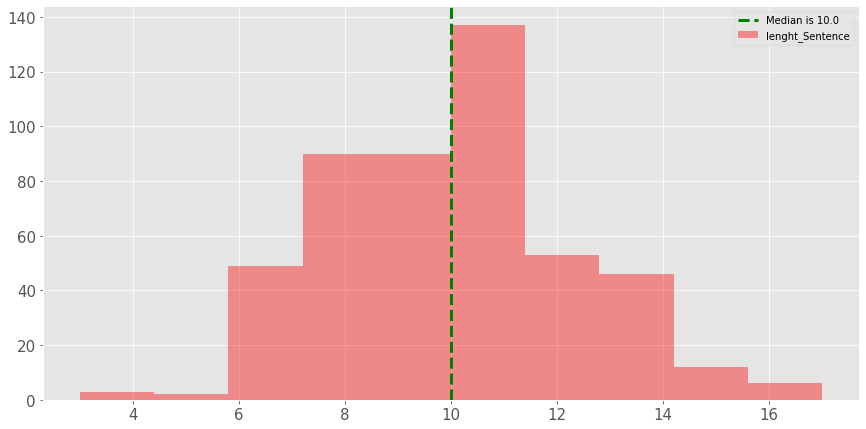

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(x = 'lenght_Sentence', data=filtered_df,alpha=0.4, color="red",bins=10,histtype = 'bar');
median = filtered_df['lenght_Sentence'].median()
plt.tight_layout()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.axvline(median, color='green', label=f'Median is {median}', lw = 3,linestyle='--')
leg = plt.legend()
plt.show()

No handles with labels found to put in legend.


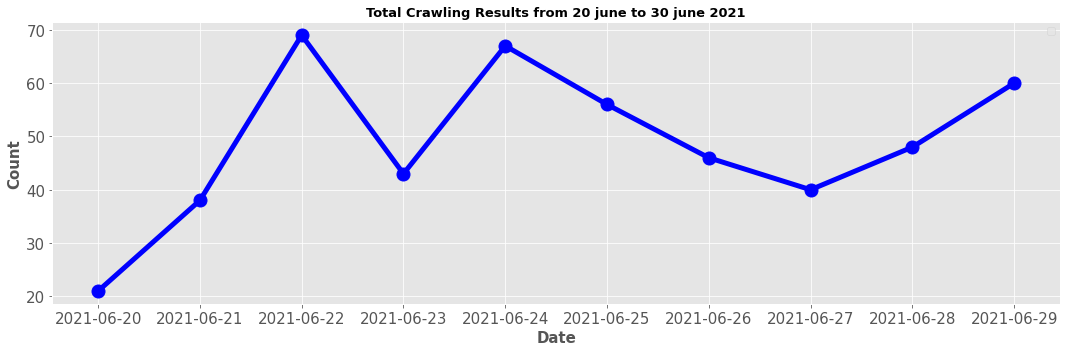

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(date_group, color ='blue', 
        linewidth=5, 
        marker='o',
        markeredgecolor='blue',
        markersize=13)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.title('Total Crawling Results from 20 june to 30 june 2021', fontsize = 13,fontweight="bold");
plt.xlabel('Date', fontsize = 15,fontweight="bold")
plt.ylabel('Count', fontsize = 15,fontweight="bold");
plt.tight_layout()
leg = plt.legend()
plt.show()


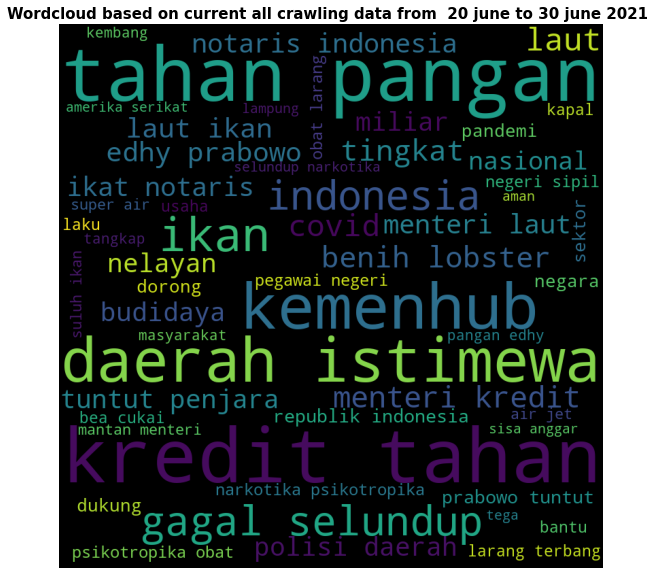

In [ ]:
token_bersih =" ".join(filtered_df['token_bersih'])
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000, min_font_size = 20).generate(token_bersih)
#plot the word cloud
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.imshow(wordcloud)
#fig.suptitle('Wordcloud based on current all crawling data', fontsize=30) # Add the text/suptitle to figure
plt.title('Wordcloud based on current all crawling data from  20 june to 30 june 2021 ', fontsize=15,fontweight="bold");
plt.axis('off')
plt.show()

No handles with labels found to put in legend.


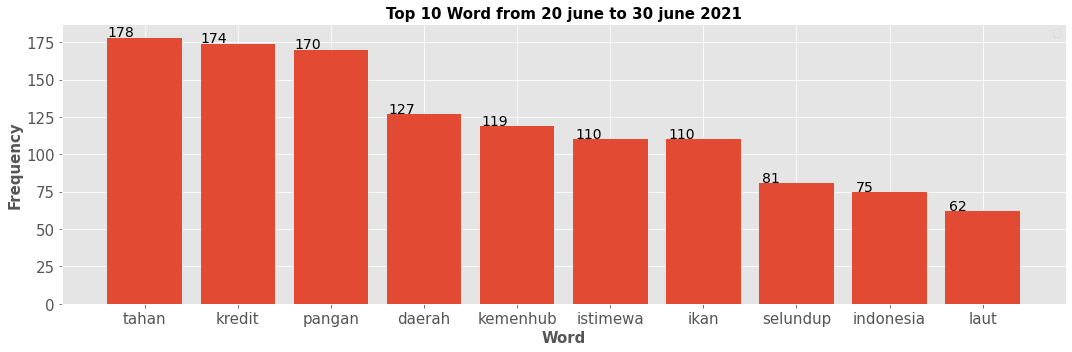

In [ ]:
from nltk import ngrams
from collections import Counter
from matplotlib.ticker import FuncFormatter

words = nltk.word_tokenize(token_bersih)
bow = Counter(words) # bag of words
data_bow = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
data_bow = data_bow.sort_values(by=['frequency'], ascending=False)

fig, ax = plt.subplots(1,1, figsize=(15,5))
data_bow = data_bow.iloc[:10]
word = data_bow['word']
frequency = data_bow['frequency']
graph  = ax.bar(word,frequency)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

plt.title('Top 10 Word from 20 june to 30 june 2021', fontsize = 15,fontweight="bold");
plt.xlabel('Word', fontsize = 15,fontweight="bold")
plt.ylabel('Frequency', fontsize = 15,fontweight="bold");
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
leg = plt.legend()
plt.show()



No handles with labels found to put in legend.


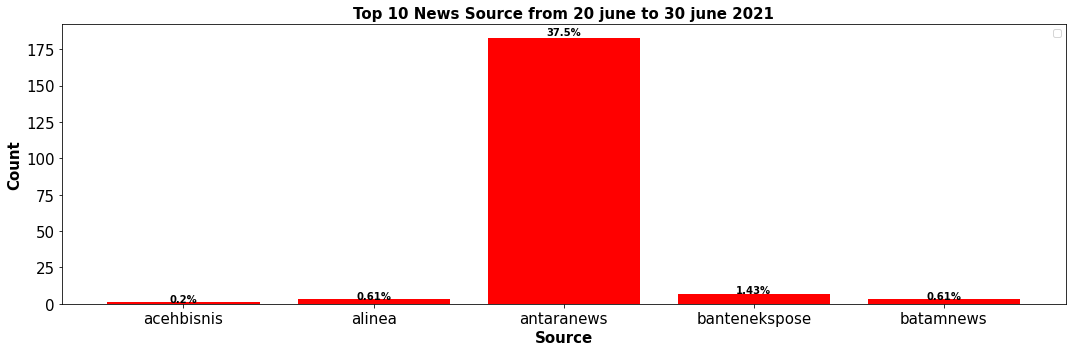

In [ ]:
source_group = filtered_df.groupby(['sumber']).agg({'sumber' : ['count']}).reset_index()
source_group.columns = ['sumber','jumlah']

percentage = []
total = source_group.jumlah.sum()
for i in range(source_group.shape[0]):
    pct = (source_group.jumlah[i] / total) * 100
    percentage.append(round(pct,2))
source_group['Percentage'] = percentage


fig, ax = plt.subplots(1,1, figsize=(15,5))
source_group = source_group.iloc[:5]
source = source_group['sumber']
jumlah = source_group['jumlah']
graph  = ax.bar(source,jumlah,color = 'red')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(source_group.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1

plt.title('Top News Source from 20 june to 30 june 2021', fontsize = 15,fontweight="bold");
plt.xlabel('Source', fontsize = 15,fontweight="bold")
plt.ylabel('Count', fontsize = 15,fontweight="bold");
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
leg = plt.legend()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer()
#data_vektor = vectorizer.fit_transform(data['token_bersih'].fillna(' '))
data_vektor = vectorizer.fit_transform(np.array(data['token_bersih'].fillna(' ').values.astype('U')))
terms = vectorizer.get_feature_names()
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5, random_state = 42 , learning_method='online')
lda.fit(data_vektor)

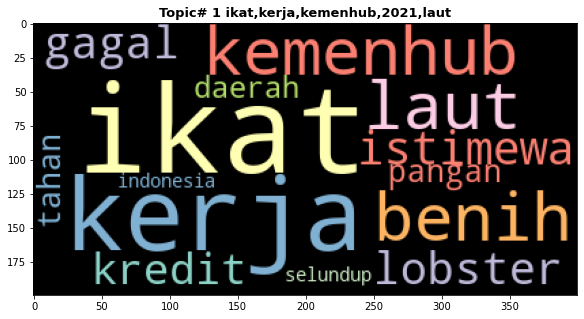

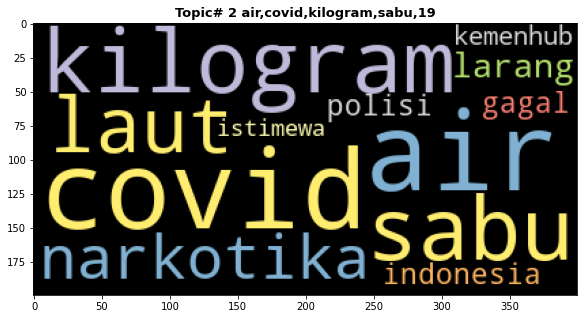

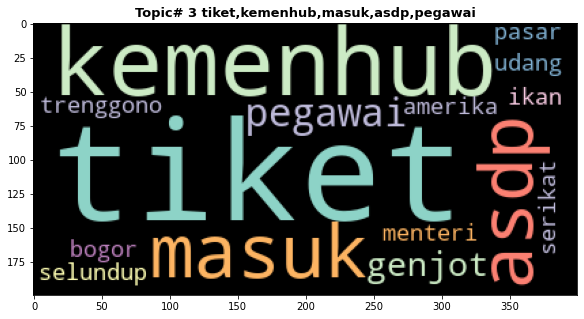

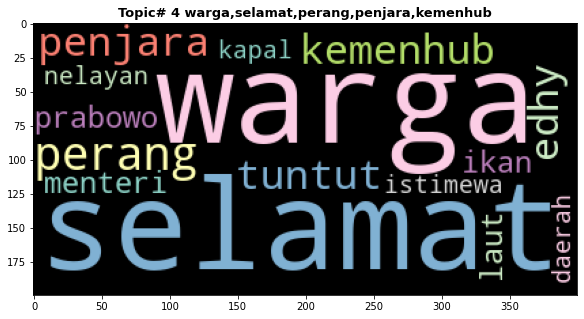

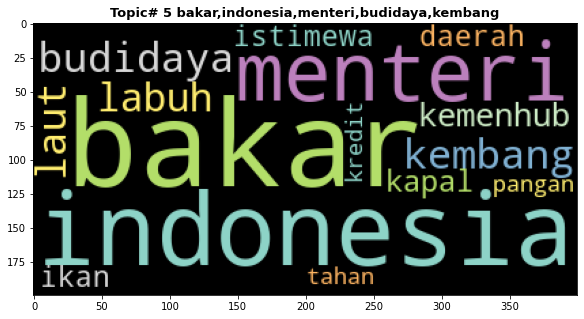

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
for index, topic in enumerate(lda.components_):
  tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
  text = " ".join(str(topik) for topik in tmps)
  title_text = ",".join(str(topik) for topik in tmps[:5])
  title_text = "Topic# " + str(index+1) +' ' + title_text
  wordcloud = WordCloud(max_words=1000,colormap='Set3', background_color="black",min_font_size=12).generate(text)
  plt.figure(figsize=(10,5))
  plt.title(title_text, fontsize = 13,fontweight="bold");
  plt.imshow(wordcloud)
  plt.show()

In [ ]:

text = "Jangan Sampai Stres, Ini 5 Faktor Bisa Menyebabkan Gejala Berkepanjangan pada Pasien Covid-19"
print(len(text.split()))

13
